In [7]:
%load_ext autoreload
%autoreload 1
%aimport ecg_get_data
%aimport Models
%aimport train_test_validat
%aimport self_attention
%aimport ECGplot
import random
import Models 
from train_test_validat import *
from self_attention import *
import  ecg_get_data 
import ECGplot

import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
    
from sklearn.metrics import f1_score

random_seed = 2
torch.manual_seed(random_seed)    # reproducible
torch.cuda.manual_seed_all(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
test_npy_path =  './data/test/' #路径
xml_path = './xml/xml/'
lead_index = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
EcgChannles_num = 12
EcgLength_num = 5000
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [3]:
test_Dataset = ecg_get_data.ECG_Dataset(test_npy_path,EcgChannles_num,EcgLength_num,xml_folder=xml_path)

npys:{%d} 100


In [36]:
testmodel = Models.channels_split_ATT_CNN_(mark=True).to(DEVICE)
testmodel.load_state_dict(torch.load("./model/20221007_074508/parameter_EarlyStoping_0.pt"))

<All keys matched successfully>

In [37]:
TEST_BATCH_SIZE = test_Dataset.npys.__len__()
test_dataloader = Data.DataLoader(dataset=test_Dataset, batch_size=TEST_BATCH_SIZE)
test_acc = []   
criterion = torch.nn.CrossEntropyLoss() 
y_true,y_pred,test_loss,test_acc = eval_model(test_dataloader,criterion,testmodel,DEVICE) # 测试模型
print('loss =',test_loss,'acc =',test_acc)
print('f1_macro =',f1_score(y_true, y_pred, average='macro')) 

loss = 0.5879532098770142 acc = 0.79
f1_macro = 0.7898108297467722


In [16]:
def MaxMinNormalization(x,Max,Min):
    x = (x - Min) / (Max - Min);
    return x

## tow head attention

In [ ]:
itme = 2
inputs,labels = test_Dataset.__getitem__(itme)
inputs = inputs.unsqueeze(0)
inputs = inputs.to(DEVICE)
labels = labels.to(DEVICE)  
outputs = testmodel(inputs)
_,pred = outputs.max(1) # 求概率最大值对应的标签
attention_matrix = np.zeros((2,12,1250,1250))
attention_matrix[0,0] = (((testmodel.att1v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,1] = (((testmodel.att2v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,2] = (((testmodel.att3v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,3] = (((testmodel.att4v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,4] = (((testmodel.att5v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,5] = (((testmodel.att6v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,6] = (((testmodel.att7v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,7] = (((testmodel.att8v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,8] = (((testmodel.att9v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,9] = (((testmodel.att10v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,10] = (((testmodel.att11v_1.to('cpu'))[0]).detach().numpy())
attention_matrix[0,11] = (((testmodel.att12v_1.to('cpu'))[0]).detach().numpy())

attention_matrix[1,0] = (((testmodel.att1v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,1] = (((testmodel.att2v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,2] = (((testmodel.att3v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,3] = (((testmodel.att4v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,4] = (((testmodel.att5v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,5] = (((testmodel.att6v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,6] = (((testmodel.att7v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,7] = (((testmodel.att8v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,8] = (((testmodel.att9v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,9] = (((testmodel.att10v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,10] = (((testmodel.att11v_2.to('cpu'))[0]).detach().numpy())
attention_matrix[1,11] = (((testmodel.att12v_2.to('cpu'))[0]).detach().numpy())

In [6]:
attention_matrix_normalized = MaxMinNormalization(attention_matrix,attention_matrix.max(),attention_matrix.min())

NameError: name 'attention_matrix' is not defined

In [34]:
attention_matrix.max()

0.0030948352068662643

In [35]:
attention_matrix.min()

0.0003105510550085455

In [36]:
minimum_data = np.minimum(attention_matrix_normalized[0],attention_matrix_normalized[1])

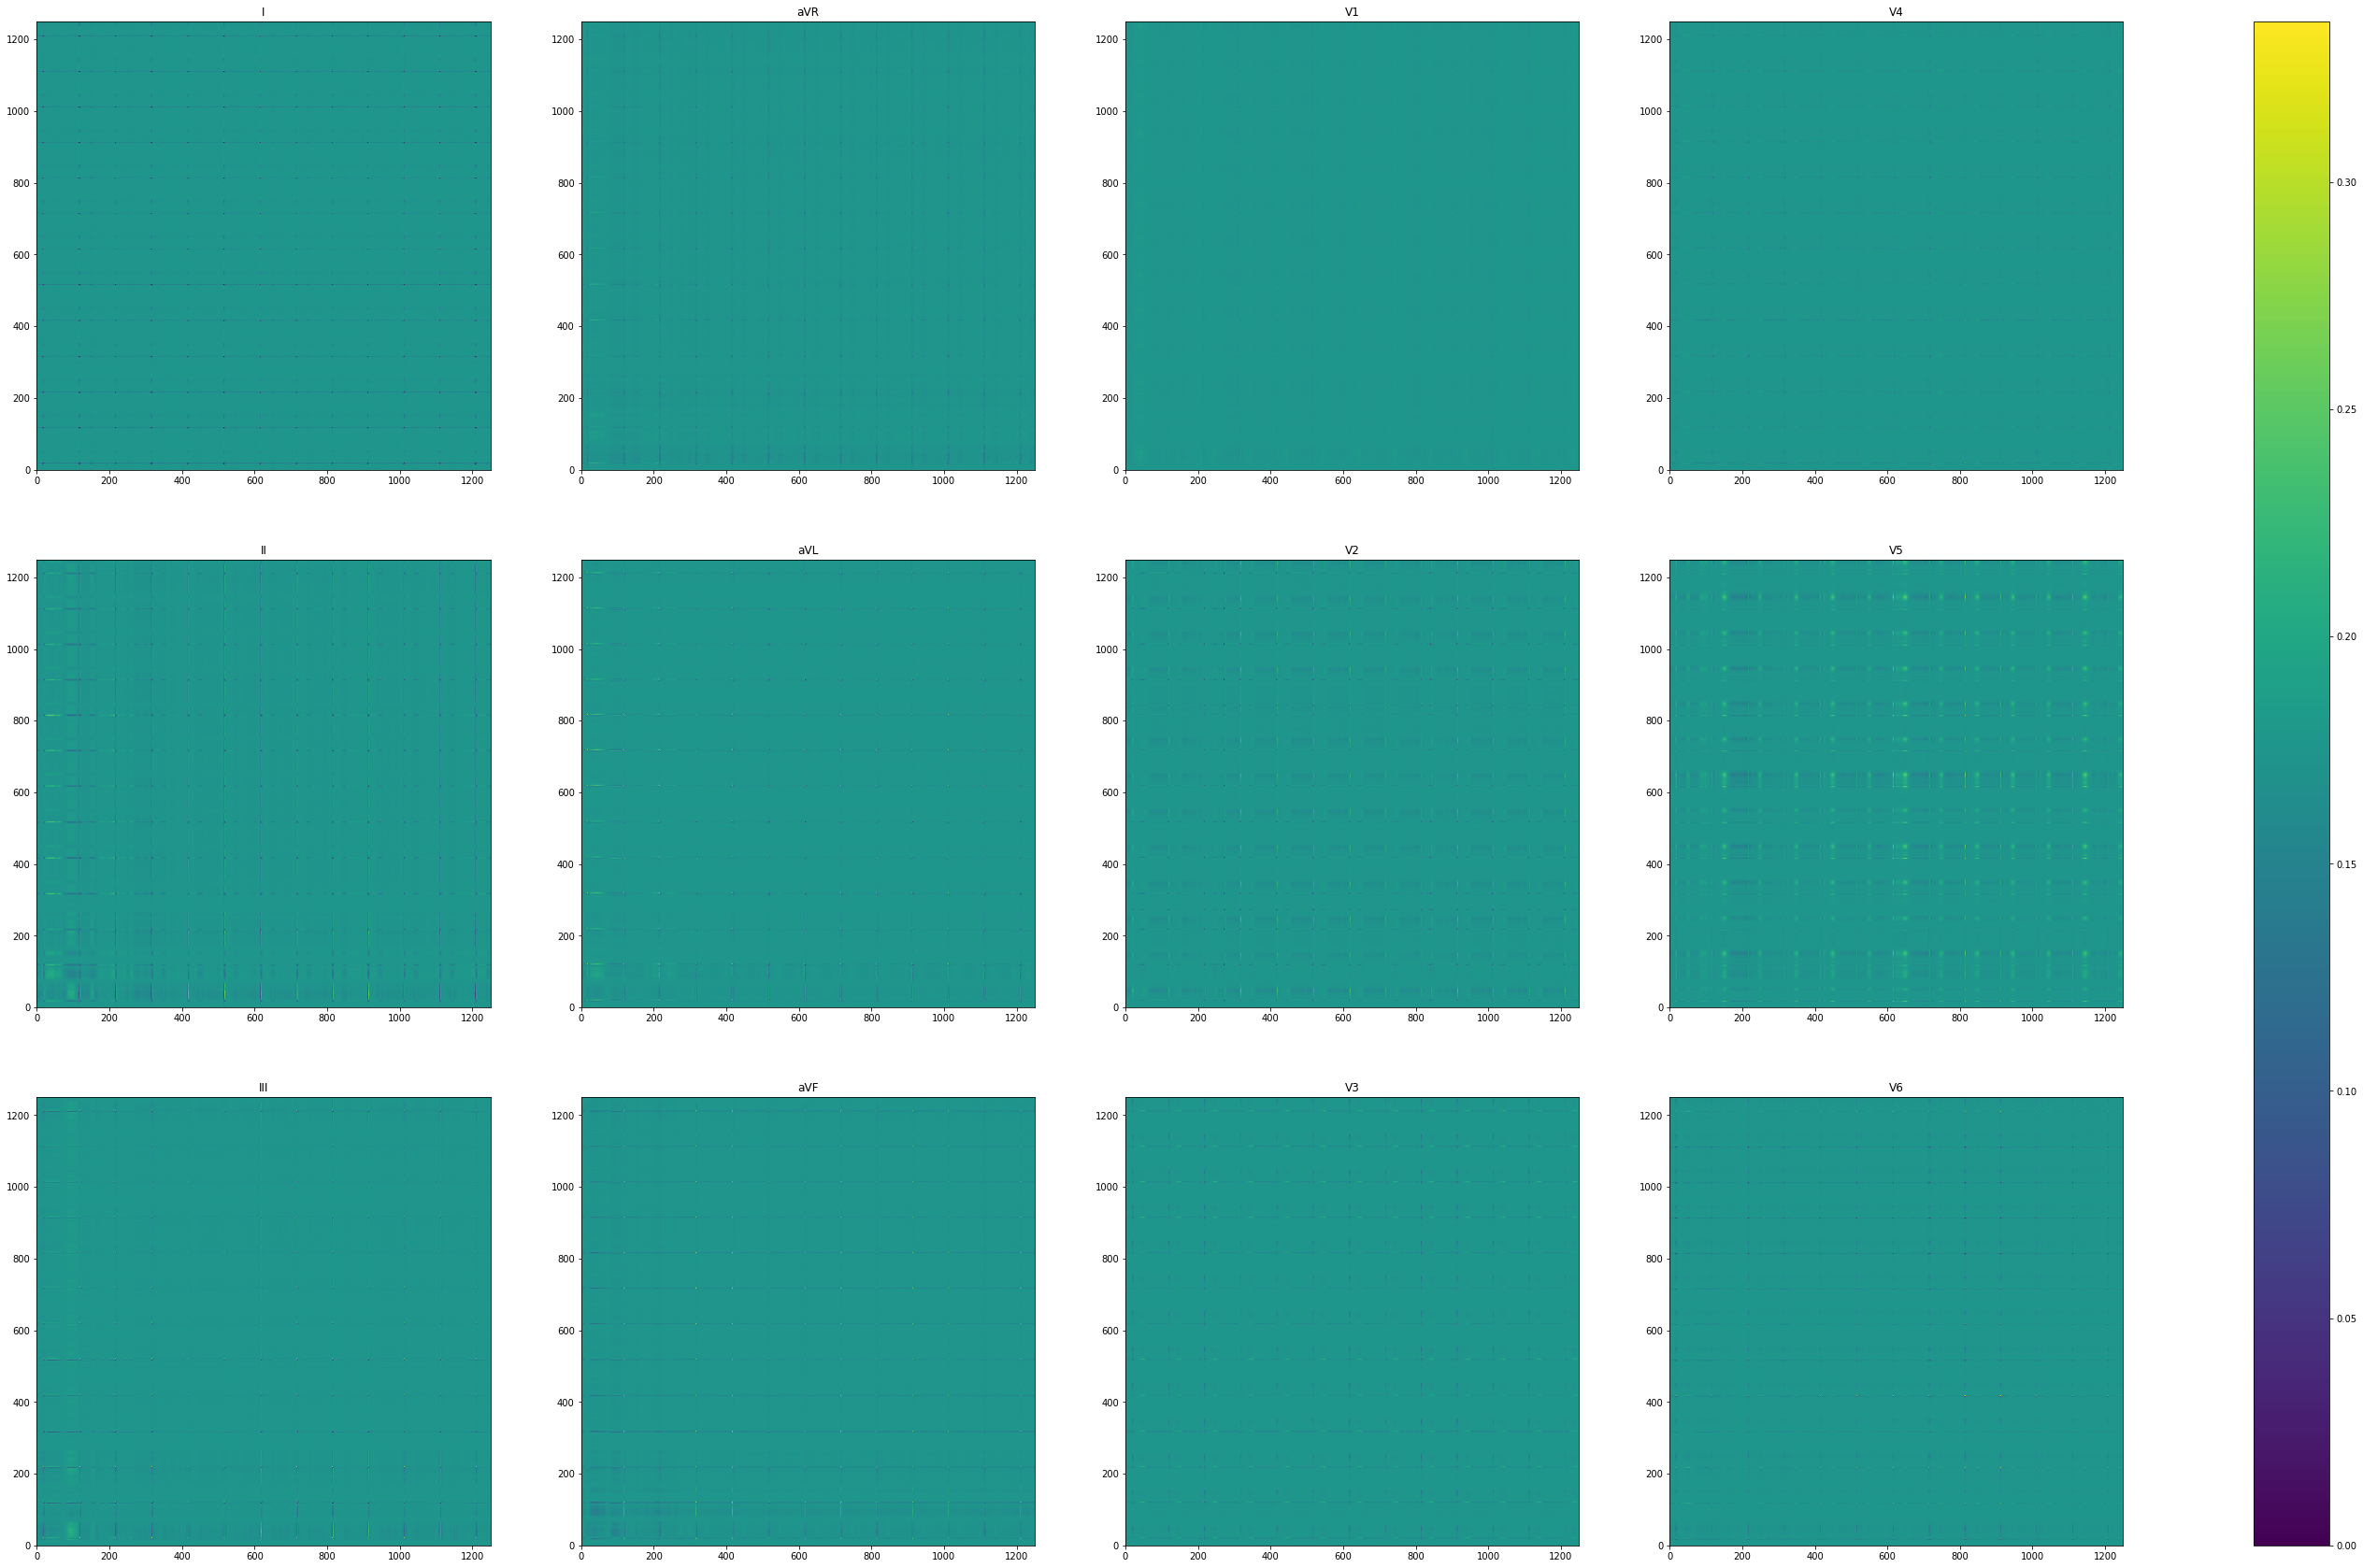

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(50, 30))
i = 0

for col in range(4):
    for row in range(3):
        ax = axs[row, col]
        ax.set_title(lead_index[i])
        pcm = ax.pcolormesh(minimum_data[i],cmap='viridis',vmin=minimum_data.min(),vmax=minimum_data.max())
        i = i+1
fig.colorbar(pcm, ax=axs)

## one head attention

In [18]:
itme = 2
inputs,labels = test_Dataset.__getitem__(itme)
inputs = inputs.unsqueeze(0)
inputs = inputs.to(DEVICE)
labels = labels.to(DEVICE)  
outputs = testmodel(inputs)
_,pred = outputs.max(1) # 求概率最大值对应的标签
attention_matrix = np.zeros((12,1250,1250))
attention_matrix[0] = (((testmodel.attv1.to('cpu'))[0]).detach().numpy())
attention_matrix[1] = (((testmodel.attv2.to('cpu'))[0]).detach().numpy())
attention_matrix[2] = (((testmodel.attv3.to('cpu'))[0]).detach().numpy())
attention_matrix[3] = (((testmodel.attv4.to('cpu'))[0]).detach().numpy())
attention_matrix[4] = (((testmodel.attv5.to('cpu'))[0]).detach().numpy())
attention_matrix[5] = (((testmodel.attv6.to('cpu'))[0]).detach().numpy())
attention_matrix[6] = (((testmodel.attv7.to('cpu'))[0]).detach().numpy())
attention_matrix[7] = (((testmodel.attv8.to('cpu'))[0]).detach().numpy())
attention_matrix[8] = (((testmodel.attv9.to('cpu'))[0]).detach().numpy())
attention_matrix[9] = (((testmodel.attv10.to('cpu'))[0]).detach().numpy())
attention_matrix[10] = (((testmodel.attv11.to('cpu'))[0]).detach().numpy())
attention_matrix[11] = (((testmodel.attv12.to('cpu'))[0]).detach().numpy())

In [19]:
attention_matrix_normalized = MaxMinNormalization(attention_matrix,attention_matrix.max(),attention_matrix.min())

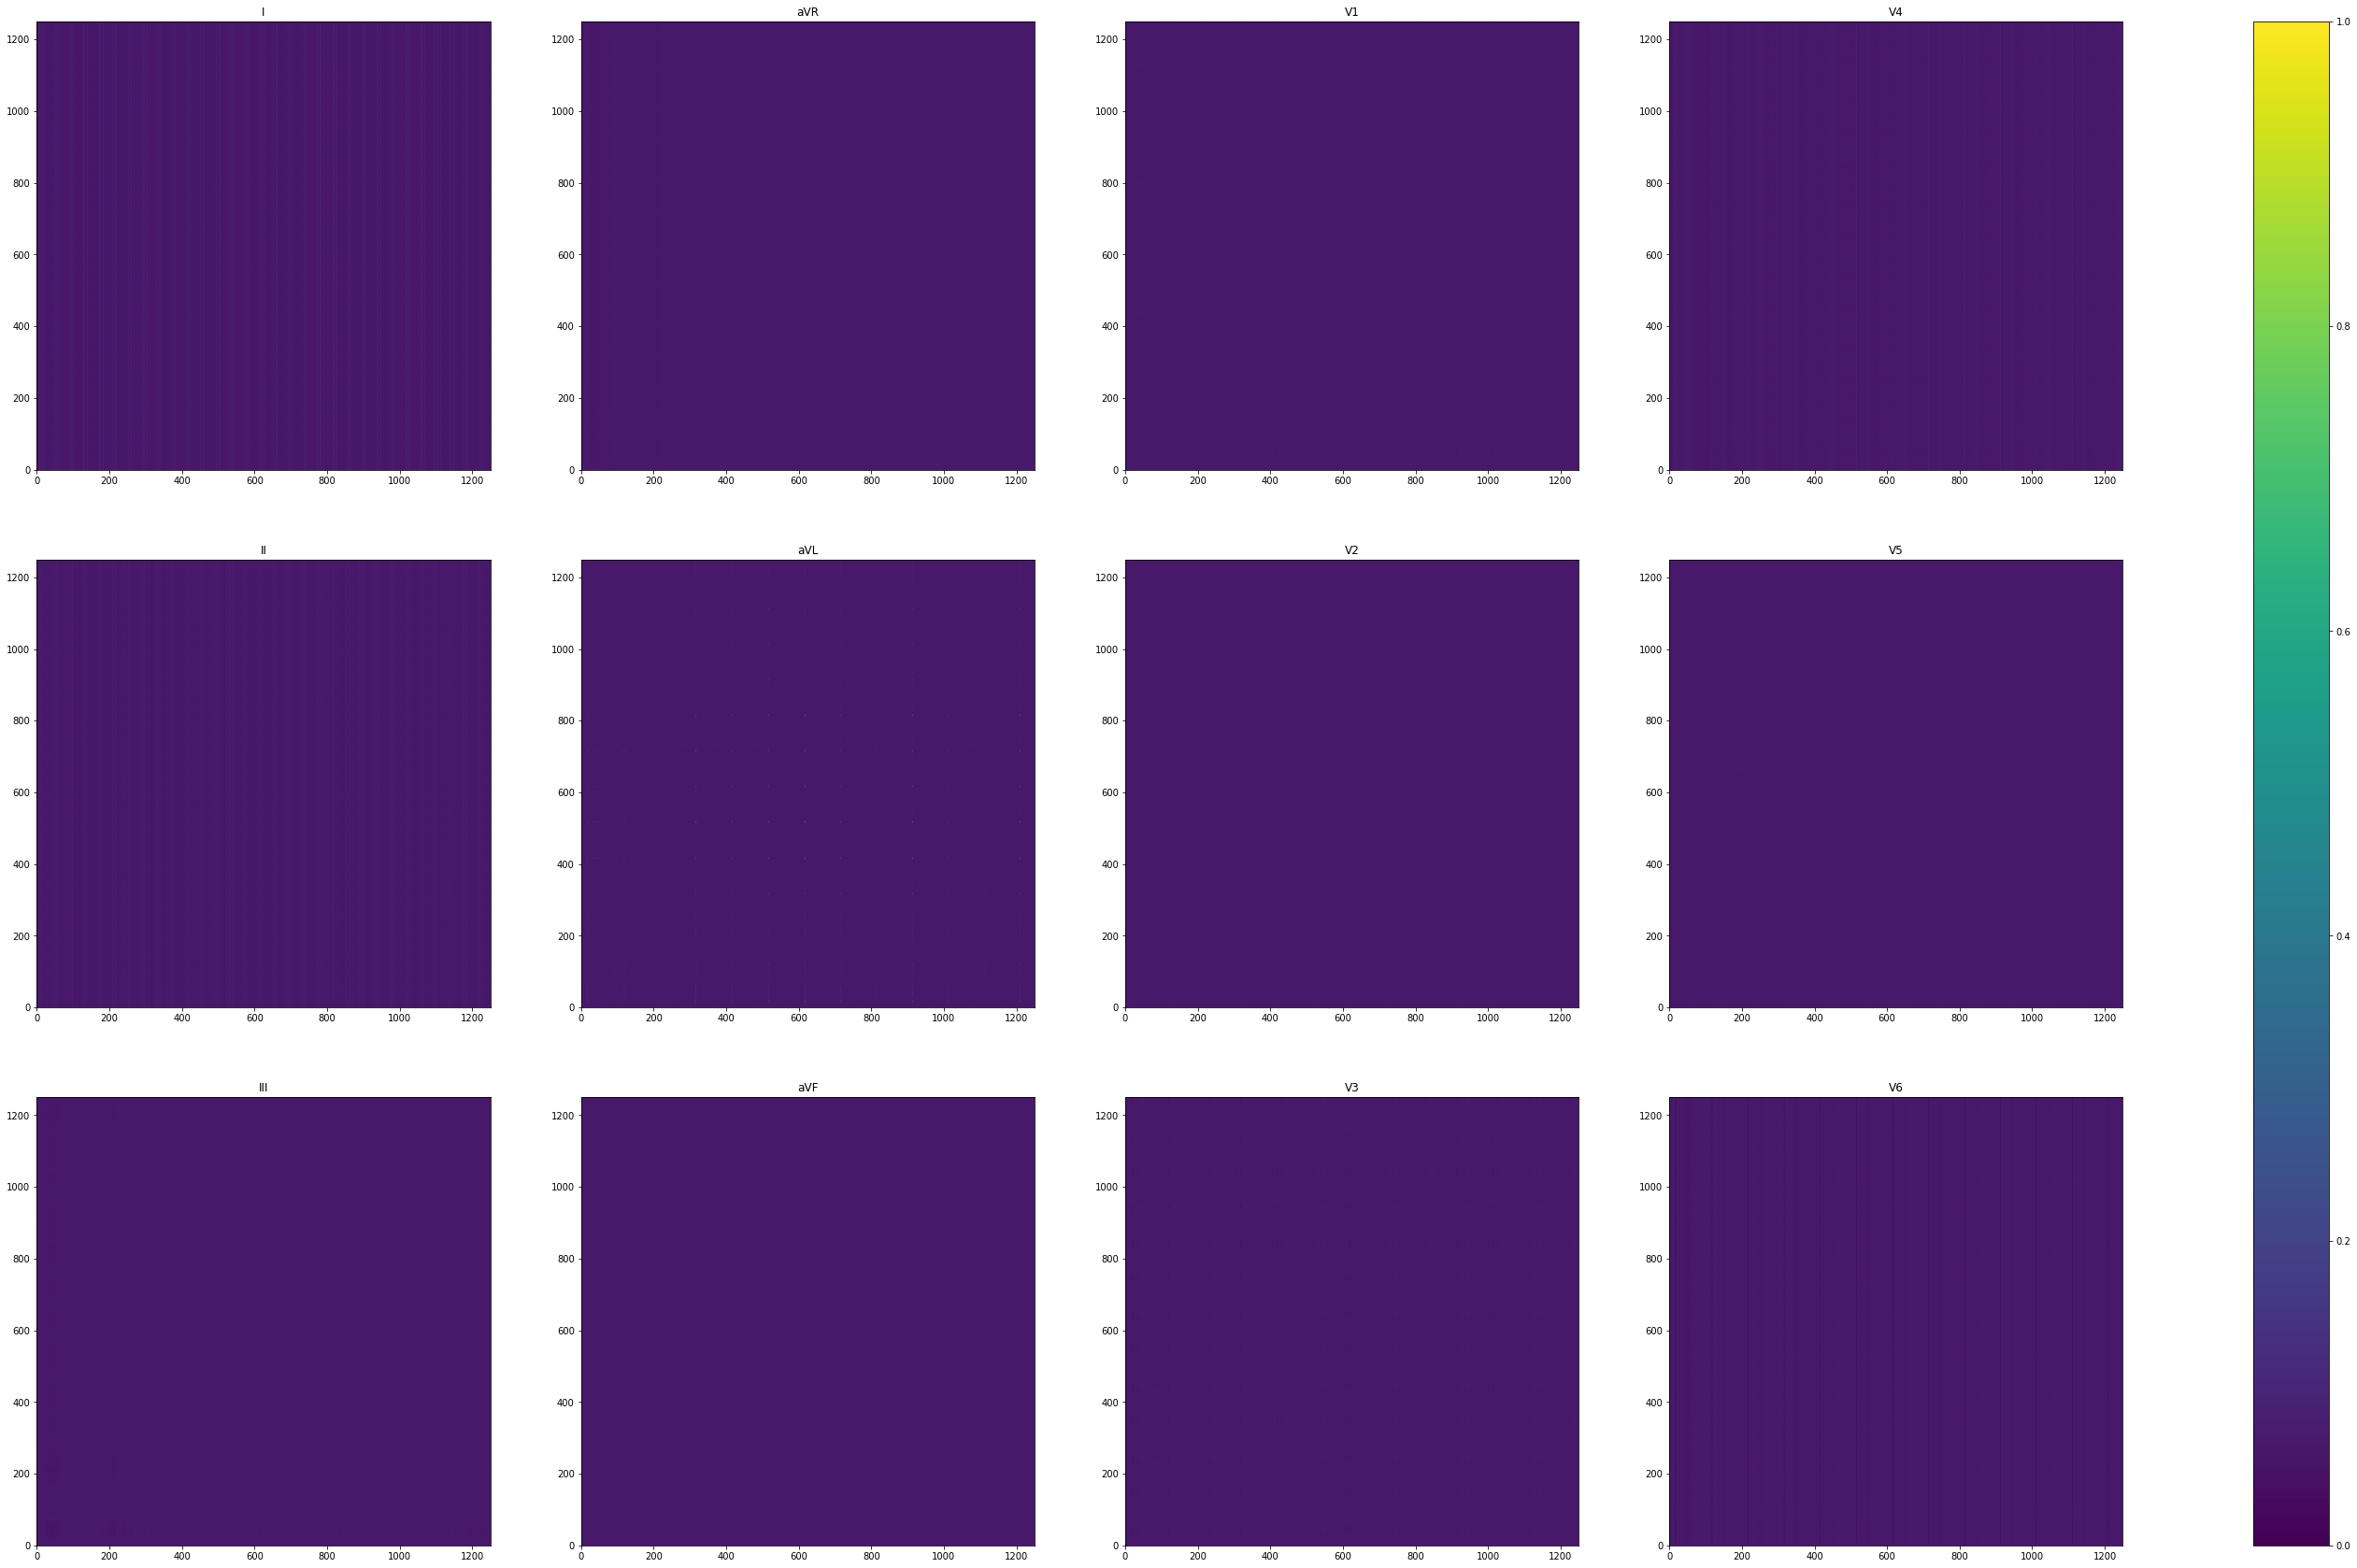

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(50, 30))
i = 0

for col in range(4):
    for row in range(3):
        ax = axs[row, col]
        ax.set_title(lead_index[i])
        pcm = ax.pcolormesh(attention_matrix_normalized[i],cmap='viridis',vmin=attention_matrix_normalized.min(),vmax=attention_matrix_normalized.max())
        i = i+1
fig.colorbar(pcm, ax=axs)

In [ ]:
attention_value_timestep = np.zeros((len(test_dataloader),12,1250))#5000/4 = 1250
attention_value_timestep[i] = (((test_model.attention_value2.to('cpu'))[0]).detach().numpy()).sum(axis=0) #将得到的attention矩阵(5000,5000) 按着每行叠加起来，得到（5000，）的attention值
attention_value_timestep[i]

In [ ]:
attention_value__each_timestep = np.zeros(EcgLength_num,)
factor = int(EcgLength_num/len(attention_value_timestep[0]))
for i in range(0,EcgLength_num,factor):
    if (i/factor)>=len(attention_value_timestep[0]):
        break
    attention_value__each_timestep[i:i+factor] = attention_value_timestep[0][int(i/factor)]
x_index = np.arange(0,EcgLength_num)
fig, axs = plt.subplots(nrows=12, ncols=1, sharex=True,sharey=True,figsize=(90,40), constrained_layout=True)
for i,ax in enumerate(axs.flat):  # type: ignore
    #plot_y = x[1,i,:]*(4.88)
    plot_y = np.array(test_x[0,i,:])*3500/1000
    ECGplot.plot_multicolored_line(fig,ax,x = x_index,y= plot_y,color_depend=attention_value__each_timestep,cmap="turbo",y_name = str(lead_index[i])+" Voltage(mV)"
                                        ,title = lead_index[i])